<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">TP : Filtre passif
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Notes de calcul
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt

# Mesures

In [2]:
# propriétés des dipôles utilisés
R = 1.e3 # en ohm
u_R = .05e3

C = 100e-9 # en farad
u_C = .5e-9

In [3]:
## Données expérimentales étudiants
# fréquences choisies
f = np.array([50, 75, 100, 150, 200, 300, 400, 500, 1000, 1600, 2500, 5000, 7500, 10000, 15000, 20000, 30000])
u_f = np.array([.2, .4, .4, 1, 1, 1.2, 2, 3, 4, 6, 12, 20, 40, 80, 100, 150, 200])

# tensions d'entrée mesurées
Ue=np.array([10.1, 10.1,10.1, 10.1,10.1, 10.1,10.1, 10.1,10.0, 9.90, 9.8, 9.9,9.9,9.9,9.9,9.9,9.9])
u_Ue=np.array(len(Ue)*[.1])
# tensions de sortie mesurées
Us=np.array([10.1,10.1,10.1,10.1,10.1,9.92, 9.8, 9.6, 8.48, 7.0, 5.30, 3.05, 2.1, 1.57, 1.06, 0.8, 0.54 ])
u_Us=np.array(len(Us)*[.1])

# Diagramme de Bode

On trace : 
$$G_\text{dB}=20\log\left(\left|\dfrac{u_s}{e}\right|\right)=f(\omega)$$

en échelle logarithlmique.</br>

Puis on cherche à interpoler deux portions de droites sur les parties $\left[0, \omega_c \right[$ et $\left]\omega_c, +\infty \right[$. Ces droites forment le diagramme de Bode <i>asymptotique</i>.

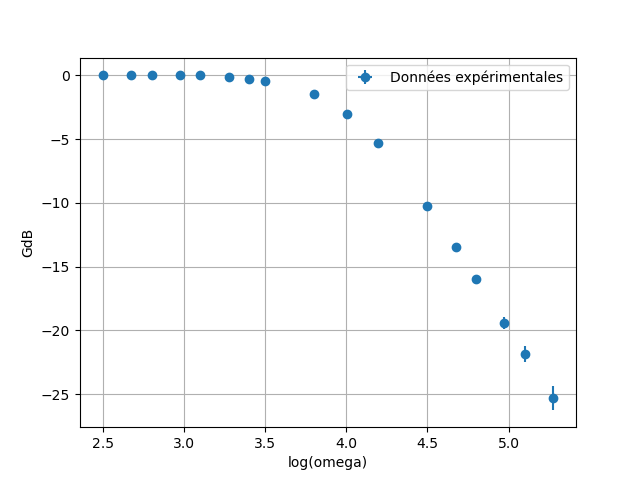

In [4]:
# paramètre de simulation MonteCarlo
N=10000

# listes de stockages
GdB_MC, u_GdB_MC = [], []
x_MC , u_x_MC= [], []

for j in range(len(f)):
    GdB, x = [], []
    for i in range(N):
        GdB.append(20*np.log10((Us[j]+u_Us[j]*np.random.uniform(-1,1))/(Ue[j]+u_Ue[j]*np.random.uniform(-1,1))))
        x.append(np.log10(2*np.pi*(f[j]+u_f[j]*np.random.uniform(-1,1))))
    GdB_MC.append(np.mean(GdB))
    u_GdB_MC.append(np.std(GdB, ddof=1))
    x_MC.append(np.mean(x))
    u_x_MC.append(np.std(x, ddof=1))

# Tracé des points expérimentaux et de l'incertitude de mesure reconstruite par MC
plt.figure()
plt.errorbar(x_MC, GdB_MC, xerr=u_x_MC, yerr = u_GdB_MC, fmt='o',label="Données expérimentales")
plt.xlabel("log(omega)")
plt.ylabel("GdB")
plt.legend()
plt.grid(True)
plt.show()

On peut ensuite chercher à déterminer la pente à BF (5 premiers points) et HF (5 derniers points) en utilisant la méthode `polyfit`de `numpy`.

In [5]:
## Basse fréquence 
# Déclaration des tableaux de stockage
aBF_fit=[]
bBF_fit=[]

# Calcul des N pentes et ordonnées à l'orgine par la méthode polyfit de numpy
for i in range(N):
    z=np.polyfit(np.array(x_MC[:5]+u_x_MC[:5]*np.random.uniform(-1,1,len(x_MC[:5]))), np.array(GdB_MC[:5]+u_GdB_MC[:5]*np.random.uniform(-1,1,len(GdB_MC[:5]))),1)
    aBF_fit.append(z[0])
    bBF_fit.append(z[1])

# Calcul de la moyenne et incertitude-type de la pente a et de l'ordonnée à l'origine b
aBF_fit_moy=np.mean(aBF_fit)
u_aBF_fit=np.std(aBF_fit,ddof=1)

bBF_fit_moy=np.mean(bBF_fit)
u_bBF_fit=np.std(bBF_fit, ddof=1)


## Haute fréquence
# Déclaration des tableaux de stockage
aHF_fit=[]
bHF_fit=[]

# Calcul des N pentes et ordonnées à l'orgine par la méthode polyfit de numpy
for i in range(N):
    z=np.polyfit(np.array(x_MC[11:]+u_x_MC[11:]*np.random.uniform(-1,1,len(x_MC[11:]))), np.array(GdB_MC[11:]+u_GdB_MC[11:]*np.random.uniform(-1,1,len(GdB_MC[11:]))),1)
    aHF_fit.append(z[0])
    bHF_fit.append(z[1])

# Calcul de la moyenne et incertitude-type de la pente a et de l'ordonnée à l'origine b
aHF_fit_moy=np.mean(aHF_fit)
u_aHF_fit=np.std(aHF_fit,ddof=1)

bHF_fit_moy=np.mean(bHF_fit)
u_bHF_fit=np.std(bHF_fit, ddof=1)

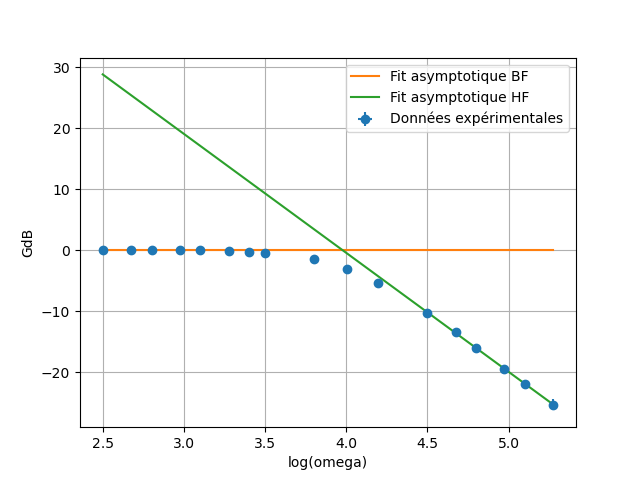

La valeur de la pente à HF est de  -19.5 +/- 0.57



In [6]:
# Calcul du nuage de points associé à la droite de régression calculée précédemment
x=np.linspace(np.min(x_MC), np.max(x_MC), 1000)
yBF=aBF_fit_moy*x + bBF_fit_moy
yHF=aHF_fit_moy*x+bHF_fit_moy

# Tracé du nuage de points associé aux valeurs possibles de log(omega) et de GdB
plt.figure()
plt.errorbar(x_MC, GdB_MC, xerr=u_x_MC, yerr = u_GdB_MC, fmt='o',label="Données expérimentales")
plt.plot(x,yBF, label="Fit asymptotique BF")
plt.plot(x,yHF, label="Fit asymptotique HF")
plt.xlabel("log(omega)")
plt.ylabel("GdB")
plt.legend()
plt.grid(True)
plt.show()

print("La valeur de la pente à HF est de ",format(aHF_fit_moy,"#.1f"), "+/-",format(u_aHF_fit,"#.2f"))
print()

# Pulsation de coupure

L'étude du circuit permet d'établir que la pulsation de coupure théorique est :
$$\omega_c=\frac{1}{RC}$$

In [7]:
# Valeur déduite de R et C avec reconstruction de l'incertitude de mesure sur omega_c
N=100000
omega_store = []
for i in range(N):
    omega_store.append(1/((R+u_R*np.random.uniform(-1,1))*(C+u_C*np.random.uniform(-1,1))))

omega_c = np.mean(omega_store)
u_omega_c = np.std(omega_store, ddof=1)

# Valeur déduite du tracé de la fonction de transfert par la méthode de l'intersection des courbes asymptotiques
x_exp = [-(bBF_fit[i]-bHF_fit[i])/(aBF_fit[i]-aHF_fit[i]) for i in range(len(bBF_fit))]

omega_c_fit = np.mean(10**(np.array(x_exp)))
u_omega_c_fit = np.std(10**(np.array(x_exp)), ddof=1)

print("La valeur théorique de la pulsation de coupure est : ",format(omega_c,"#.2e"), "+/-",format(u_omega_c,"#.3e"), "rad/s")
print("La valeur expérimentale de la pulsation de coupure est : ",format(omega_c_fit,"#.2e"), "+/-",format(u_omega_c_fit,"#.3e"), "rad/s")

La valeur théorique de la pulsation de coupure est :  1.00e+04 +/- 2.906e+02 rad/s
La valeur expérimentale de la pulsation de coupure est :  9.46e+03 +/- 4.882e+02 rad/s


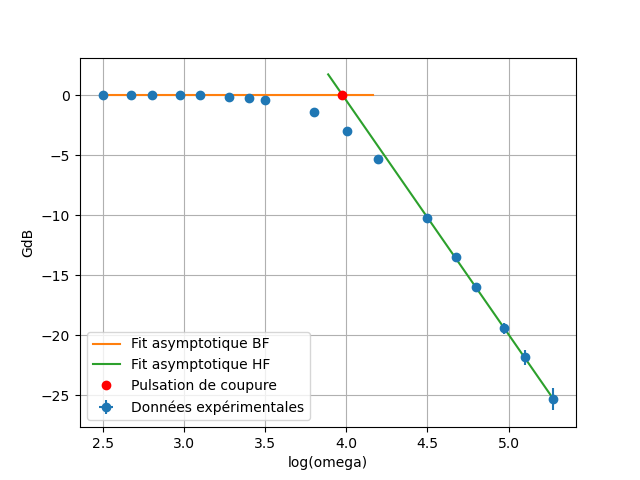

In [8]:
# Tracé du nuage de points associé aux valeurs possibles de log(omega) et de GdB
plt.figure()
plt.errorbar(x_MC, GdB_MC, xerr=u_x_MC, yerr = u_GdB_MC, fmt='o',label="Données expérimentales")
plt.plot(x[:600],yBF[:600], label="Fit asymptotique BF")
plt.plot(x[500:],yHF[500:], label="Fit asymptotique HF")
plt.plot(np.mean(np.array(x_exp)),aHF_fit_moy*np.mean(np.array(x_exp))+bHF_fit_moy, 'o',color='r', label="Pulsation de coupure")
plt.xlabel("log(omega)")
plt.ylabel("GdB")
plt.legend()
plt.grid(True)
plt.show()

# Conclusions

In [9]:
print("L'écart relatif entre valeur mesurée et calculée est de la pente est :",format(100*np.abs((-20-aHF_fit_moy)/20),"#.2f"),"%")
print("L'écart relatif entre valeur mesurée et calculée est de la pulsation de coupure est :",format(100*np.abs((omega_c-omega_c_fit)/omega_c),"#.2f"),"%")

L'écart relatif entre valeur mesurée et calculée est de la pente est : 2.65 %
L'écart relatif entre valeur mesurée et calculée est de la pulsation de coupure est : 5.44 %
